Task1

Load the classification dataset. [Dataset = House_Area_Data.xlsx]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

url = 'house_price_data.csv'
data = pd.read_csv(url, delimiter=',', header=None)
data.columns = ["housesize", "bedrooms", "price"]
print(data)

    housesize  bedrooms   price
0        2104         3  399900
1        1600         3  329900
2        2400         3  369000
3        1416         2  232000
4        3000         4  539900
5        1985         4  299900
6        1534         3  314900
7        1427         3  198999
8        1380         3  212000
9        1494         3  242500
10       1940         4  239999
11       2000         3  347000
12       1890         3  329999
13       4478         5  699900
14       1268         3  259900
15       2300         4  449900
16       1320         2  299900
17       1236         3  199900
18       2609         4  499998
19       3031         4  599000
20       1767         3  252900
21       1888         2  255000
22       1604         3  242900
23       1962         4  259900
24       3890         3  573900
25       1100         3  249900
26       1458         3  464500
27       2526         3  469000
28       2200         3  475000
29       2637         3  299900
30      

Task 02:

Plot the class features and color them according to your class label. [Hint: Use Scatterplot]

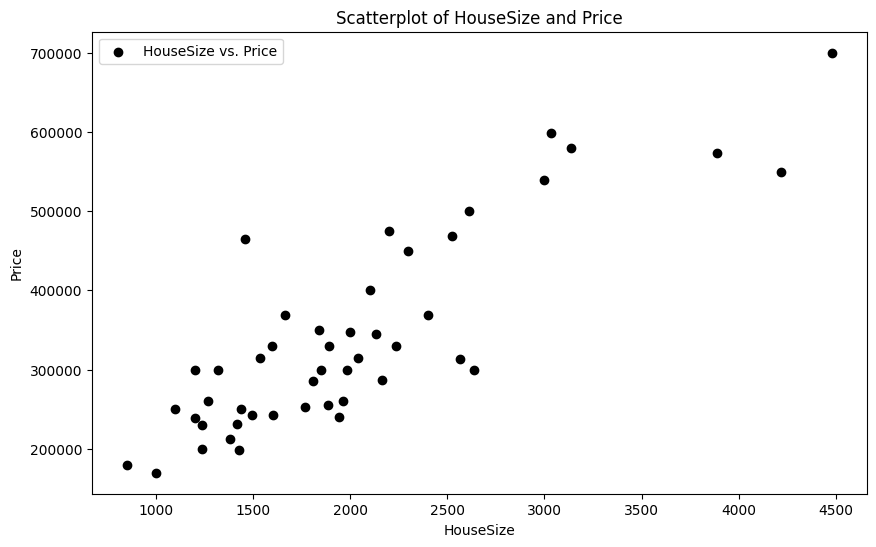

In [ ]:

housesize = data['housesize']
bedrooms = data['bedrooms']
price = data['price']


plt.figure(figsize=(10, 6))
plt.scatter(housesize, price, c='black', label='HouseSize vs. Price')

plt.xlabel('HouseSize')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Scatterplot of HouseSize and Price')
plt.show()


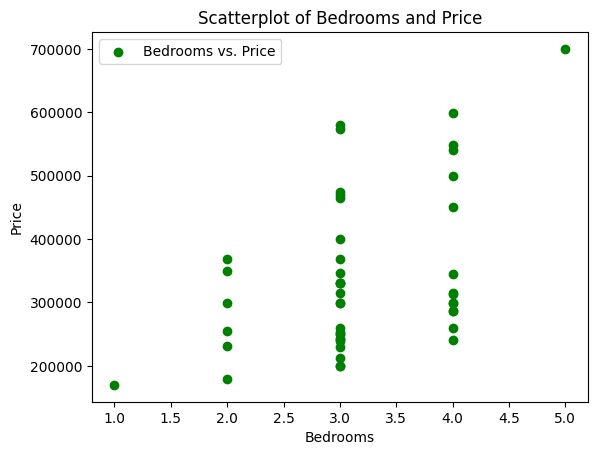

In [ ]:
plt.scatter(bedrooms, price, c='green', label='Bedrooms vs. Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.title('Scatterplot of Bedrooms and Price')
plt.show()

Task 03:

Display the statistical information per class of the feature matrix like mean, median, standard
deviation and variance.

In [ ]:
data.describe()

,housesize,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


Task 04:

Prepare the dataset by normalizing or scaling the feature set. [Hint: Normalization range -1 to
1 or 0 to 1]

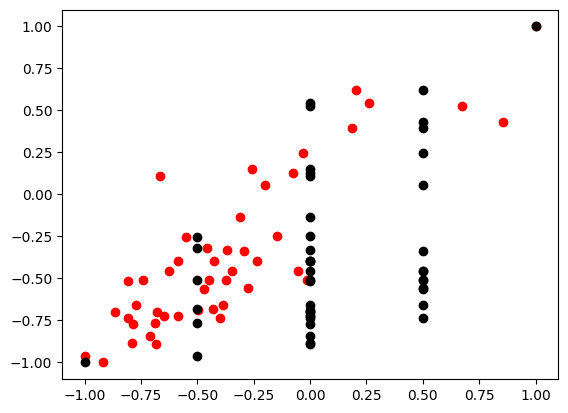

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = data[['housesize', 'bedrooms', 'price']]

scaler = MinMaxScaler(feature_range=(-1, 1))

scaled_features = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_features, columns=['housesize', 'bedrooms', 'price'])

housesize = scaled_df['housesize']
bedrooms = scaled_df['bedrooms']
price = scaled_df['price']

plt.scatter(housesize, price, c='red', label='size vs. Price')
plt.scatter(bedrooms, price, c='black', label='Bedrooms] vs. Price')

plt.show()


Task 05:

Prepare the training and testing dataset. Split them into a 80-20% ratio size.

In [ ]:
from sklearn.model_selection import train_test_split

X = scaled_df[['housesize', 'bedrooms']]
y = scaled_df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

# Display the sizes of the training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("Training set size:", y_train.shape[0])
print("Testing set size:", y_test.shape[0])
print(X_train)
print(X_test)
print(y_train)
print(y_test)


Training set size: 37
Testing set size: 10
Training set size: 37
Testing set size: 10
    housesize  bedrooms
10  -0.399890       0.5
33   0.260342       0.0
25  -0.863210       0.0
3   -0.688913      -0.5
6   -0.623828       0.0
14  -0.770546       0.0
35  -0.677330       0.0
26  -0.665747       0.0
43  -0.808053       0.0
21  -0.428571      -0.5
45  -0.448428       0.5
12  -0.427468       0.0
28  -0.256481       0.0
44  -1.000000      -0.5
1   -0.587424       0.0
41  -0.235521       0.0
39  -0.277441       0.5
0   -0.309432       0.0
20  -0.495312       0.0
24   0.675676       0.0
8   -0.708770       0.0
22  -0.585218       0.0
38   0.854937       0.5
5   -0.375069       0.5
34  -0.471042       0.5
18  -0.030888       0.5
13   1.000000       1.0
9   -0.645891       0.0
17  -0.788196       0.0
27  -0.076669       0.0
46  -0.806398       0.0
15  -0.201324       0.5
29  -0.015444       0.0
37  -0.293988       0.5
32  -0.344732       0.5
19   0.201875       0.5
4    0.184777       0.5
  

Task 06:

Implement the hypothesis function.

In [ ]:
def hypothesis(X, theta):
    prediction = np.dot(X, theta)

    return prediction

Task 07:

Implement the cost function.

In [ ]:
def mean_squared_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    mse = np.mean((y_true - y_pred) ** 2)

    return mse


Task 08:

Implement the gradient descent function.

In [ ]:

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []

    for iteration in range(num_iterations):

        predictions = hypothesis(X, theta)


        errors = predictions - y

        gradient = (1 / m) * np.dot(X.T, errors)


        theta -= learning_rate * gradient

        mse_cost=mean_squared_error(y,predictions)
        cost_history.append(mse_cost)

    return theta, cost_history



Task 09:

Find the best fitted line with the gradient descent function

In [ ]:

theta = np.zeros(3)

learning_rate = 0.1
num_iterations = 10

# Add a bias term (intercept) to the feature matrix
X_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])  # Add a column of ones for the bias term


# Call the gradient descent function to find the best-fitted line
optimal_theta, cost_history = gradient_descent(X_bias, y_train, theta, learning_rate, num_iterations)

# Extract the optimized parameters
intercept, coef_size, coef_bedrooms = optimal_theta

print(optimal_theta)

[-0.17269005  0.22893116  0.04207889]


Task 10:

Plot graph of cost function vs. epoch.

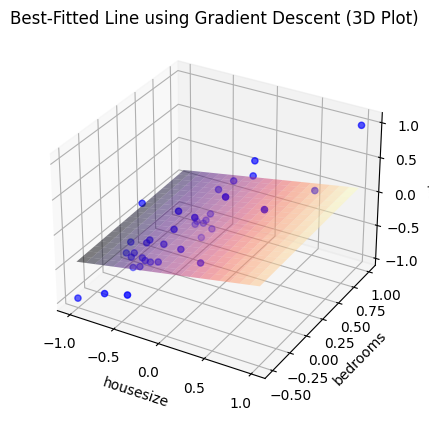

Optimized Intercept (Theta0): -0.1726900513686944
Optimized Coefficient for Size (Theta1): 0.2289311572494736
Optimized Coefficient for bedrooms (Theta2): 0.04207889135557565


In [ ]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train['housesize'], X_train['bedrooms'], y_train, c='b', marker='o', label='Data Points')

size_range = np.linspace(min(X_train['housesize']), max(X_train['housesize']), 20)
bedrooms_range = np.linspace(min(X_train['bedrooms']), max(X_train['bedrooms']), 20)
size_mesh, bedrooms_mesh = np.meshgrid(size_range, bedrooms_range)


price_mesh = intercept + coef_size * size_mesh + coef_bedrooms * bedrooms_mesh

ax.plot_surface(size_mesh, bedrooms_mesh, price_mesh, alpha=0.5, cmap='magma', label='Best-Fitted Plane')


ax.set_xlabel('housesize')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
ax.set_title('Best-Fitted Line using Gradient Descent (3D Plot)')



# Show the 3D plot
plt.show()

# Print the optimized parameters
print(f"Optimized Intercept (Theta0): {intercept}")
print(f"Optimized Coefficient for Size (Theta1): {coef_size}")
print(f"Optimized Coefficient for bedrooms (Theta2): {coef_bedrooms}")

Task 11


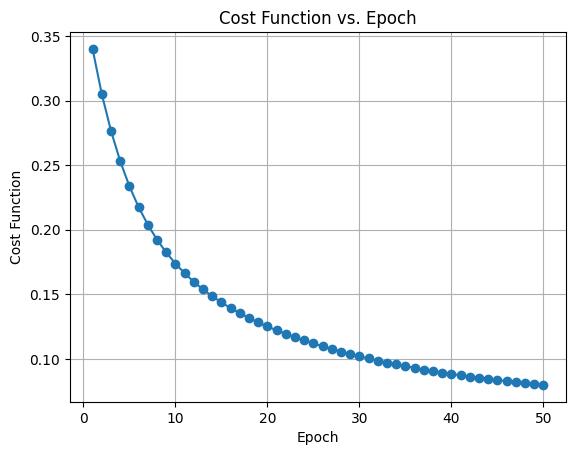

In [ ]:

theta = np.zeros(3)

learning_rate = 0.1
num_iterations = 50

# Add a bias term (intercept) to the feature matrix
X_bias = np.column_stack([np.ones(X_train.shape[0]), X_train])  # Add a column of ones for the bias term

cost_history = []

for epoch in range(num_iterations):

    optimal_theta, cost = gradient_descent(X_bias, y_train, theta, learning_rate, 1)

    cost_history.append(cost)

    theta = optimal_theta

plt.plot(range(1, num_iterations + 1), cost_history, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Cost Function')
plt.title('Cost Function vs. Epoch')
plt.grid(True)
plt.show()


Task 12


Coefficients (theta): [0.92023001 0.02780697]
Intercept (bias term): -0.008311282569131995


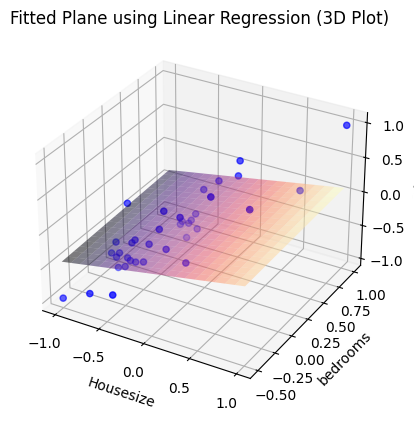

In [ ]:

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

theta = model.coef_
bias = model.intercept_
print("Coefficients (theta):", theta)
print("Intercept (bias term):", bias)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(X_train['housesize'], X_train['bedrooms'], y_train, c='b', marker='o', label='Actual Prices')


size_range = np.linspace(min(X_train['housesize']), max(X_train['housesize']), 20)
bedrooms_range = np.linspace(min(X_train['bedrooms']), max(X_train['bedrooms']), 20)
size_mesh, bedrooms_mesh = np.meshgrid(size_range, bedrooms_range)



ax.plot_surface(size_mesh, bedrooms_mesh, price_mesh, alpha=0.5, cmap='magma', label='Fitted Plane')

ax.set_xlabel('Housesize')
ax.set_ylabel('bedrooms')
ax.set_zlabel('Price')
ax.set_title('Fitted Plane using Linear Regression (3D Plot)')

plt.show()